In [29]:
### mnist - keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import sys
import tensorflow as tf
import os

In [2]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

In [3]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


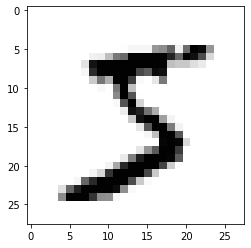

In [6]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[0], cmap='Greys')
plt.show()

In [9]:
for x in xtrain[0]:
    for i in x:
#       sys.stdout.write('%d\t' % i)
#   sys.stdout.write('\n')

SyntaxError: unexpected EOF while parsing (<ipython-input-9-0db32c2ca3e8>, line 4)

In [10]:
xtrain = xtrain.reshape(xtrain.shape[0],784).astype('float64')/255
xtest = xtest.reshape(xtest.shape[0],784).astype('float64')/255

In [12]:
ytrain = np_utils.to_categorical(ytrain,10)
ytest = np_utils.to_categorical(ytest,10)

In [16]:
# model 구성
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

## model 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [20]:
# model 최적화
modeldir = './mymodel/'

if not os.path.exists(modeldir):
    modelpath = './mymodel/{epoch:02d}-{val_loss:.4f}.hdf5'
    os.mkdir(modeldir)
# model 저장 옵션 설정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 
es = EarlyStopping(monitor='val_loss', patience=10)

In [23]:
# model 생성
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=30, batch_size=200, callbacks=[checkpointer, es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0792 - val_accuracy: 0.9801

Epoch 00001: val_loss did not improve from 0.05770
Epoch 2/30
60000/60000 [==============================] - 3s 54us/step - loss: 9.4711e-04 - accuracy: 0.9999 - val_loss: 0.0649 - val_accuracy: 0.9833

Epoch 00002: val_loss did not improve from 0.05770
Epoch 3/30
60000/60000 [==============================] - 3s 55us/step - loss: 4.2928e-04 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9828

Epoch 00003: val_loss did not improve from 0.05770
Epoch 4/30
60000/60000 [==============================] - 3s 57us/step - loss: 3.2665e-04 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 0.9830

Epoch 00004: val_loss did not improve from 0.05770
Epoch 5/30
60000/60000 [==============================] - 3s 57us/step - loss: 2.8326e-04 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy

In [24]:
print('test accuracy : %.4f' % (model.evaluate(xtest,ytest)[1]))

10000/10000 [==============================] - 0s 47us/step
test accuracy : 0.9785


In [25]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']

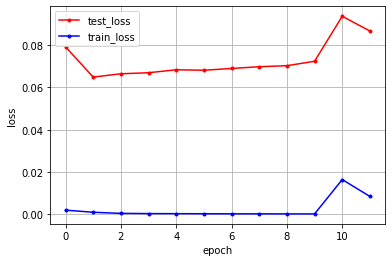

In [27]:
xlen = np.arange(len(train_loss))

plt.plot(xlen, val_loss, marker='.', c='red', label='test_loss')
plt.plot(xlen, train_loss, marker='.', c='blue', label='train_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [47]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

In [48]:
xtrain2 = xtrain.reshape(xtrain.shape[0],28,28,1).astype('float64')/255
xtest2 = xtest.reshape(xtest.shape[0],28,28,1).astype('float64')/255

In [49]:
ytrain = np_utils.to_categorical(ytrain,10)
ytest = np_utils.to_categorical(ytest,10)

In [50]:
print(xtrain2.shape, ytrain.shape, xtest2.shape, ytest.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [51]:
model2 = Sequential()
# Conv2D(filter갯수, kernel_size=(,), input_shape=(r,c,color), activation= )
model2.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.25))
# Flatten() - 1차원으로 변경
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

In [52]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model2.fit(xtrain2, ytrain, validation_data=(xtest2,ytest), epochs=30, batch_size=200, callbacks=[checkpointer, es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2798 - accuracy: 0.9143 - val_loss: 0.0584 - val_accuracy: 0.9805

Epoch 00001: val_loss did not improve from 0.05770
Epoch 2/30
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0864 - accuracy: 0.9750 - val_loss: 0.0365 - val_accuracy: 0.9882

Epoch 00002: val_loss improved from 0.05770 to 0.03645, saving model to ./mymodel/02-0.0365.hdf5
Epoch 3/30
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0659 - accuracy: 0.9799 - val_loss: 0.0342 - val_accuracy: 0.9890

Epoch 00003: val_loss improved from 0.03645 to 0.03423, saving model to ./mymodel/03-0.0342.hdf5
Epoch 4/30
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.0317 - val_accuracy: 0.9892

Epoch 00004: val_loss improved from 0.03423 to 0.03167, saving model to ./mymodel/04-0.0317.hdf5
Epoch 5/30
60000

In [53]:
print('test accuracy : %.4f' % (model2.evaluate(xtest2,ytest)[1]))

10000/10000 [==============================] - 3s 316us/step
test accuracy : 0.9932
